In [ ]:
import pandas as pd
import numpy as np

data = {
    "ID": [101, 102, 103, 104, 105],
    "NAME": ["MOI", "EM THIEN", "CAU BAR", "NAM", None],
    "TUOI": [21, 20, None, 1, 3],
    "SALARY": [5000, 4000, 3000, None, 1000]
}

df = pd.DataFrame(data)

# Điền giá trị thiếu trong cột TUOI = trung bình
df['TUOI'] = df['TUOI'].fillna(df['TUOI'].mean())

# Loại bỏ các dòng chứa dữ liệu thiếu
df_drop_na = df.dropna()

# Điền giá trị thiếu trong NAME = 'Unknown'
df['NAME'] = df['NAME'].fillna('Unknown')

# Điền giá trị thiếu trong SALARY bằng phương pháp nội suy (Interpolation)
df['SALARY']=df['SALARY'].interpolate(method="linear")

# In kết quả
print("DataFrame sau khi điền giá trị thiếu trong TUOI là trung bình:")
print(df)

print("\nDataFrame sau khi loại bỏ các dòng chứa dữ liệu thiếu:")
print(df_drop_na)

print("\nDataFrame sau khi điền giá trị thiếu trong NAME là 'Unknown' và SALARY bằng nội suy:")
print(df)


DataFrame sau khi điền giá trị thiếu trong TUOI là trung bình:
    ID      NAME   TUOI  SALARY
0  101       MOI  21.00  5000.0
1  102  EM THIEN  20.00  4000.0
2  103   CAU BAR  11.25  3000.0
3  104       NAM   1.00  2000.0
4  105   Unknown   3.00  1000.0

DataFrame sau khi loại bỏ các dòng chứa dữ liệu thiếu:
    ID      NAME   TUOI  SALARY
0  101       MOI  21.00  5000.0
1  102  EM THIEN  20.00  4000.0
2  103   CAU BAR  11.25  3000.0

DataFrame sau khi điền giá trị thiếu trong NAME là 'Unknown' và SALARY bằng nội suy:
    ID      NAME   TUOI  SALARY
0  101       MOI  21.00  5000.0
1  102  EM THIEN  20.00  4000.0
2  103   CAU BAR  11.25  3000.0
3  104       NAM   1.00  2000.0
4  105   Unknown   3.00  1000.0
0    5000.0
1    4000.0
2    3000.0
3    2000.0
4    1000.0
Name: SALARY, dtype: float64


In [19]:
#cho data
import pandas as pd

df1 = pd.DataFrame({
    "Id": [1, 2, 3],
    "Score_A": [70, 90, 85]
})

df2 = pd.DataFrame({
    "Id": [3, 4, 5],
    "Score_A": [62, 91, 75]
})

# Thực hiện các kiểu merge trên cột 'Id'
inter_join = pd.merge(df1, df2, on="Id", how="inner")  # Inner join
left_join = pd.merge(df1, df2, on="Id", how="left")    # Left join
outer_join = pd.merge(df1, df2, on="Id", how="outer")  # Outer join

# Nối dataframe theo chiều dọc (vertical concatenation)
concat_df = pd.concat([df1, df2], ignore_index=True)

# Gộp df1 và df2 để điền giá trị thiếu
merged_df = df1.set_index("Id").combine_first(df2.set_index("Id")).reset_index()

# In kết quả
print("Inter Join:\n", inter_join)
print("\nLeft Join:\n", left_join)
print("\nOuter Join:\n", outer_join)
print("\nConcatenated DataFrame:\n", concat_df)
print("\nMerged DataFrame (Filling Missing Values):\n", merged_df)


Inter Join:
    Id  Score_A_x  Score_A_y
0   3         85         62

Left Join:
    Id  Score_A_x  Score_A_y
0   1         70        NaN
1   2         90        NaN
2   3         85       62.0

Outer Join:
    Id  Score_A_x  Score_A_y
0   1       70.0        NaN
1   2       90.0        NaN
2   3       85.0       62.0
3   4        NaN       91.0
4   5        NaN       75.0

Concatenated DataFrame:
    Id  Score_A
0   1       70
1   2       90
2   3       85
3   3       62
4   4       91
5   5       75

Merged DataFrame (Filling Missing Values):
    Id  Score_A
0   1       70
1   2       90
2   3       85
3   4       91
4   5       75


# Điền giá trị thiếu trong salary = phương pháp Interpolation# Điền giá trị thiếu trong cột Age= trung bình
# Loại bỏ các dòng chứa dữ liệu thiếu
# Điền giá trị thiếu trong name =Unknow


In [22]:
import pandas as pd
import numpy as np

# Tạo DataFrame lớn
data = pd.DataFrame({
    "Id": range(1, 1000001),  # 1 triệu dòng
    "Value": np.random.randint(1, 100, 1000000)  # Giá trị ngẫu nhiên từ 1-100
})

# 1. Dùng .astype để tối ưu hóa bộ nhớ
data['Id'] = data['Id'].astype('int32')  # Giảm bộ nhớ cho cột Id
data['Value'] = data['Value'].astype('int8')  # Giá trị từ 1-100 có thể dùng int8

print("\nBộ nhớ sử dụng sau tối ưu hóa:")
print(data.info())

# 2. Tìm 5 giá trị phổ biến nhất trong cột Value
top5_values = data['Value'].value_counts().head(5)
print("\n5 giá trị phổ biến nhất trong cột Value:")
print(top5_values)

# 3. Sử dụng query để lọc dữ liệu nhanh hơn
filtered_data = data.query('Value > 90')
print("\nSố lượng dòng có Value > 90:")
print(len(filtered_data))

# In ra 5 dòng đầu tiên của dữ liệu đã lọc
print("\nDữ liệu sau khi lọc (5 dòng đầu):")
print(filtered_data.head())



Bộ nhớ sử dụng sau tối ưu hóa:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   Id      1000000 non-null  int32
 1   Value   1000000 non-null  int8 
dtypes: int32(1), int8(1)
memory usage: 4.8 MB
None

5 giá trị phổ biến nhất trong cột Value:
Value
68    10316
74    10294
62    10276
73    10270
12    10270
Name: count, dtype: int64

Số lượng dòng có Value > 90:
90411

Dữ liệu sau khi lọc (5 dòng đầu):
    Id  Value
25  26     92
31  32     94
34  35     94
54  55     97
76  77     97


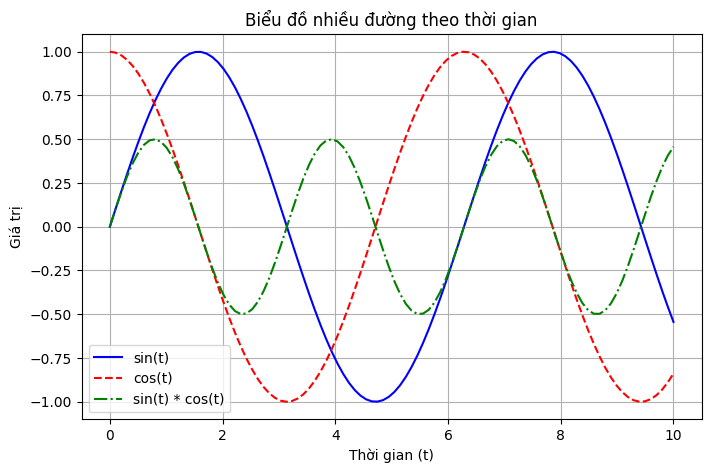

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Tạo dữ liệu
t = np.linspace(0, 10, 100)
y1 = np.sin(t)
y2 = np.cos(t)
y3 = np.sin(t) * np.cos(t)

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
plt.plot(t, y1, label="sin(t)", linestyle="-", color="b")
plt.plot(t, y2, label="cos(t)", linestyle="--", color="r")
plt.plot(t, y3, label="sin(t) * cos(t)", linestyle="-.", color="g")

# Thêm tiêu đề, nhãn và chú thích
plt.title("Biểu đồ nhiều đường theo thời gian")
plt.xlabel("Thời gian (t)")
plt.ylabel("Giá trị")
plt.legend()
plt.grid(True)

# Hiển thị biểu đồ
plt.show()


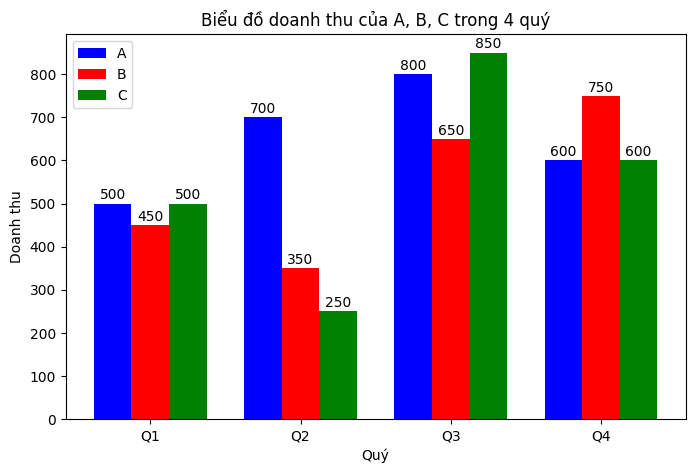

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu doanh thu của A, B, C trong 4 quý
labels = ["Q1", "Q2", "Q3", "Q4"]
A = [500, 700, 800, 600]
B = [450, 350, 650, 750]
C = [500, 250, 850, 600]

# Xác định vị trí của các nhóm cột
x = np.arange(len(labels))  # Vị trí của nhãn Q1, Q2, Q3, Q4
width = 0.25  # Độ rộng của mỗi cột

# Tạo biểu đồ thanh nhóm
plt.figure(figsize=(8, 5))  # Kích thước biểu đồ
plt.bar(x - width, A, width=width, label="A", color="blue")   # Doanh thu A
plt.bar(x, B, width=width, label="B", color="red")            # Doanh thu B
plt.bar(x + width, C, width=width, label="C", color="green")  # Doanh thu C

# Thêm tiêu đề và nhãn
plt.title("Biểu đồ doanh thu của A, B, C trong 4 quý")
plt.xlabel("Quý")
plt.ylabel("Doanh thu")
plt.xticks(x, labels)  # Đặt nhãn trục x là Q1, Q2, Q3, Q4

# Hiển thị giá trị trên từng cột
for i in range(len(labels)):
    plt.text(x[i] - width, A[i] + 10, str(A[i]), ha='center', fontsize=10)
    plt.text(x[i], B[i] + 10, str(B[i]), ha='center', fontsize=10)
    plt.text(x[i] + width, C[i] + 10, str(C[i]), ha='center', fontsize=10)

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

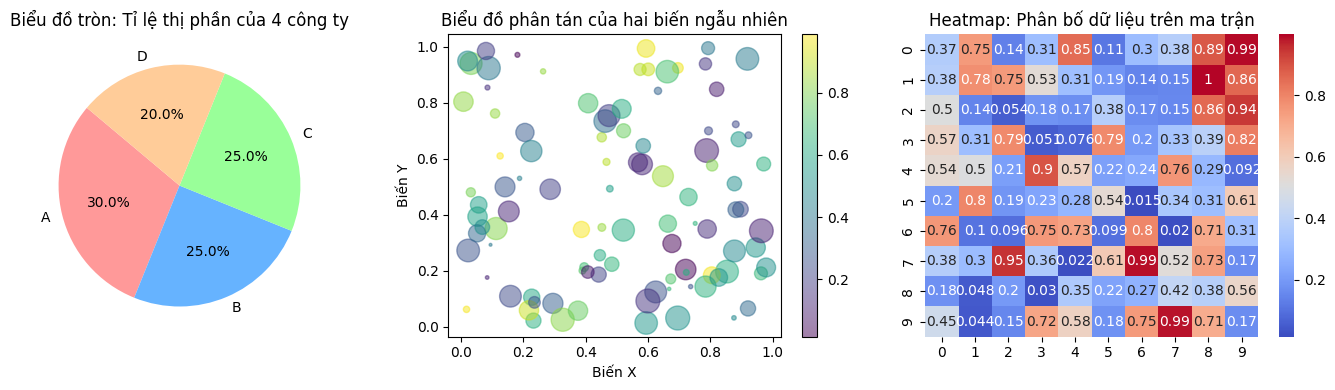

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 1. Biểu đồ tròn
Cty = ["A", "B", "C", "D"]
thiphan = [30, 25, 25, 20]
color = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"]

plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.pie(thiphan, labels=Cty, colors=color, autopct='%1.1f%%', startangle=140)
plt.title("Biểu đồ tròn: Tỉ lệ thị phần của 4 công ty")

# 2. Biểu đồ phân tán
x = np.random.rand(100)
y = np.random.rand(100)
sizes = np.random.rand(100) * 300
colors = np.random.rand(100)

plt.subplot(1, 3, 2)
plt.scatter(x, y, s=sizes, c=colors, alpha=0.5, cmap='viridis')
plt.colorbar()
plt.title("Biểu đồ phân tán của hai biến ngẫu nhiên")
plt.xlabel("Biến X")
plt.ylabel("Biến Y")

# 3. Biểu đồ nhiệt (heatmap)
data = np.random.rand(10, 10)

plt.subplot(1, 3, 3)
sns.heatmap(data, annot=True, cmap='coolwarm')
plt.title("Heatmap: Phân bố dữ liệu trên ma trận")

plt.tight_layout()
plt.show()
